In [9]:
default_bck_image = "eic_center_forward.png"

# Two correspondence points:
# (x_mm, y_mm)  <->  (x_pixel, y_pixel)
default_bck_scale_points = [
    {"mm": {"x": 0.0, "y": 0.0}, "pixel": {"x": 371.0, "y": 281.0}},
    {"mm": {"x": 4937.0, "y": 2622.0}, "pixel": {"x": 739.0, "y": 85.0}}
]

def create_plot_with_background(figsize=(20, 10), bck_image=default_bck_image, bck_scale_points=default_bck_scale_points):
    # Two correspondence points:
    #   (x_mm, y_mm)  <->  (x_pixel, y_pixel)
    p0 = bck_scale_points[0]
    p1 = bck_scale_points[1]

    p0_x_mm = p0["mm"]["x"]
    p0_y_mm = p0["mm"]["y"]
    p0_x_pixel = p0["pixel"]["x"]
    p0_y_pixel = p0["pixel"]["y"]

    p1_x_mm = p1["mm"]["x"]
    p1_y_mm = p1["mm"]["y"]
    p1_x_pixel = p1["pixel"]["x"]
    p1_y_pixel = p1["pixel"]["y"]
    # -----------------------------------------------------------------------

    # Linear mapping: x_mm = x_scale * x_pixel + x_offset (same for y)
    x_scale = (p1_x_mm - p0_x_mm) / (p1_x_pixel - p0_x_pixel)
    x_offset = p0_x_mm - x_scale * p0_x_pixel

    y_scale = (p1_y_mm - p0_y_mm) / (p1_y_pixel - p0_y_pixel)
    y_offset = p0_y_mm - y_scale * p0_y_pixel  # note: y_scale will often be negative

    def pixel_to_mm_x(x_pixel: float) -> float:
        return x_scale * x_pixel + x_offset

    def pixel_to_mm_y(y_pixel: float) -> float:
        return y_scale * y_pixel + y_offset

    # Load image
    image = mpimg.imread(bck_image)
    height_pixel, width_pixel = image.shape[:2]

    # Image extent in millimeters (left, right, bottom, top)
    left_mm = pixel_to_mm_x(0)
    right_mm = pixel_to_mm_x(width_pixel)
    top_mm = pixel_to_mm_y(0)            # origin='upper' => row 0 is the top
    bottom_mm = pixel_to_mm_y(height_pixel)

    # Plot
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(
        image,
        extent=[left_mm, right_mm, bottom_mm, top_mm],
        origin="upper",
        interpolation="nearest",
    )
    return fig, ax

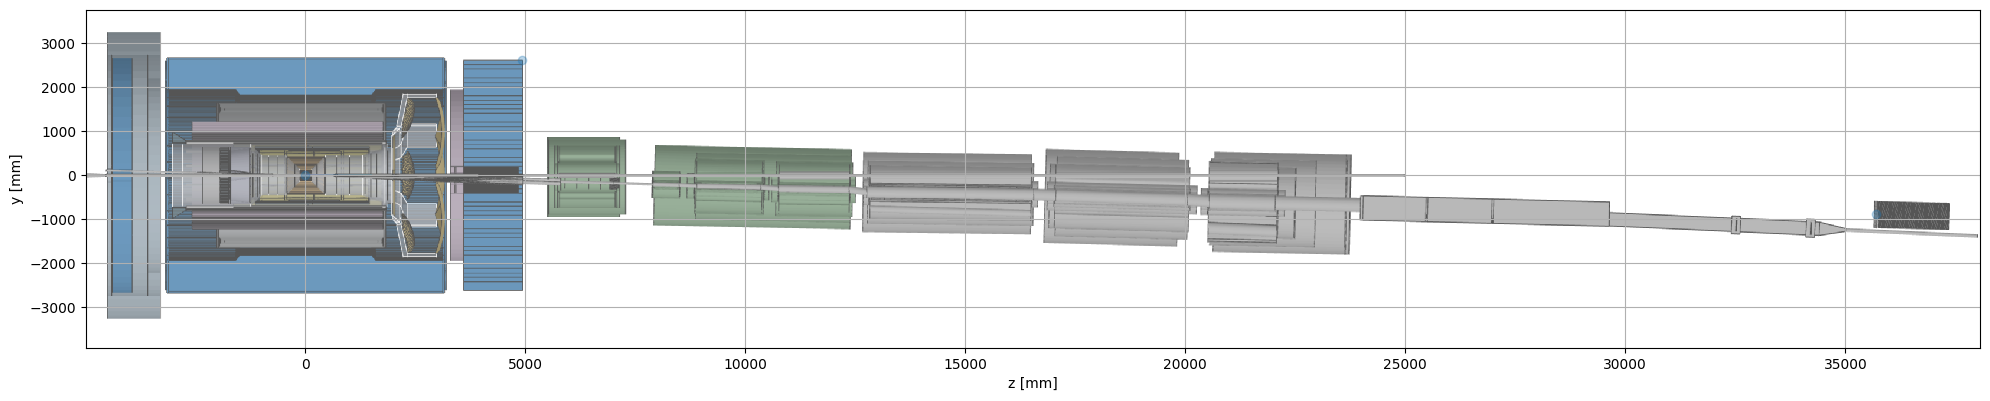

In [13]:
fig, ax = create_plot_with_background()
x_axis = [0, 4937, 35690]
y_axis = [0, 2622, -878]


# Optional: overlay the reference points to verify alignment
ax.plot(x_axis, y_axis, marker="o", linestyle="none", alpha=0.3)

ax.set_xlabel("z [mm]")
ax.set_ylabel("y [mm]")
ax.set_aspect("equal", adjustable="box")
ax.grid(True)

# Uncomment to lock the view to the image bounds:
# ax.set_xlim(min(left_mm, right_mm), max(left_mm, right_mm))
# ax.set_ylim(min(bottom_mm, top_mm), max(bottom_mm, top_mm))

plt.tight_layout()
plt.show()